# LSTM

```{note}
长短期记忆网络（long short-term memory，LSTM）相比GRU更复杂，效果也会稍好一些。
```

## 模型

LSTM有三个门控单元，输入门 $\mathbf{I}_{t}\in\mathbb{R}^{n\times{h}}$，遗忘门 $\mathbf{F}_{t}\in\mathbb{R}^{n\times{h}}$ 和输出门 $\mathbf{O}_{t}\in\mathbb{R}^{n\times{h}}$，它们的计算公式类似：

$$\mathbf{I}_{t} = \sigma(\mathbf{X}_{t}\mathbf{W}_{xi} + \mathbf{H}_{t-1}\mathbf{W}_{hi} + \mathbf{b}_{i})$$

$$\mathbf{F}_{t} = \sigma(\mathbf{X}_{t}\mathbf{W}_{xf} + \mathbf{H}_{t-1}\mathbf{W}_{hf} + \mathbf{b}_{f})$$

$$\mathbf{O}_{t} = \sigma(\mathbf{X}_{t}\mathbf{W}_{xo} + \mathbf{H}_{t-1}\mathbf{W}_{ho} + \mathbf{b}_{o})$$

除隐藏状态外，LSTM还引入了存储单元 $\mathbf{C}_{t}\in\mathbb{R}^{n\times{h}}$ 用于记录长期信息，它相比隐藏状态来说改变得会很慢。

候选记忆单元的计算与门类似，只是使用了 $\mbox{tanh}$ 作为激活函数：

$$\tilde{\mathbf{C}}_{t} = \mbox{tanh}(\mathbf{X}_t\mathbf{W}_{xc} + \mathbf{H}_{t-1}\mathbf{W}_{hc} + \mathbf{b}_c)$$

存储单元的转移由输入门和遗忘门共同控制，输入门决定了当前时刻输入信息 $\tilde{\mathbf{C}}_{t}$ 有多少被吸收，遗忘门决定了上一时刻存储单元 $\mathbf{C}_{t-1}$ 有多少不被遗忘：

$$\mathbf{C}_{t} = \mathbf{F}_{t}\odot\mathbf{C}_{t-1} + \mathbf{I}_{t}\odot\tilde{\mathbf{C}}_{t}$$

最终，LSTM的隐藏状态由输出门和存储单元共同决定：

$$\mathbf{H}_{t} = \mathbf{O}_{t}\odot\mbox{tanh}(\mathbf{C}_{t})$$

![jupyter](../images/rnn/lstm-3.svg)

## 训练

In [1]:
from torch import nn
import d2l

# 载入数据
batch_size, num_steps = 32, 40
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
# 建立模型，模型的基础结构是LSTM
num_hiddens = 256
lstm_layer = nn.LSTM(len(vocab), num_hiddens)
net = d2l.RNNModel(lstm_layer, vocab_size=len(vocab))

time traveller the sound the sound the sound the sound the sound


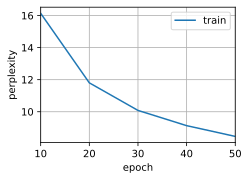

In [3]:
# 训练
num_epochs, lr = 50, 0.1
d2l.train_language_model(net, train_iter, vocab, lr, num_epochs)